## Linear Regression 

in this notebook we are going through linear regression concept and doing evaluation on google play store dataset.

**Problem Statement:**
Google Play Store team is about to launch a new feature wherein, certain apps that are promising are boosted in visibility. The boost will
manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated
games”). These will also get a boost in search results visibility. This feature will help bring more attention to newer apps that have the
potential.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
#Importing warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import and check dataset
inp0 = pd.read_csv("googleplaystore.csv")

In [4]:
# Check first five rows
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art_&_Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art_&_Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art_&_Design_Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# shape of the dataset
inp0.shape

(10841, 13)

In [6]:
#Check number of columns and rows, and data types
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
#checking datatypes
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [8]:
#Finding count of null values
inp0.isnull().sum(axis = 0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
#Dropping the records with null ratings
#This is done because ratings is our target variable
inp0.dropna(how ='any', inplace = True)

In [10]:
inp0.shape

(9360, 13)

In [11]:
inp0.isnull().sum(axis = 0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [12]:
inp0.Price.value_counts()[:2]

0        8715
$2.99     114
Name: Price, dtype: int64

In [13]:
#Cleaning the price column
inp0.Price.value_counts()[:7]

0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
$3.99      58
$1.49      30
Name: Price, dtype: int64

In [14]:
#Modifying the column
inp0['Price'] = inp0.Price.map(lambda x: 0 if x=='0' else float(x[1:]))

In [15]:
#Converting reviews to numeric
inp0.Reviews = inp0.Reviews.astype('int32')

In [16]:
inp0.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [17]:
inp0.Installs.value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [18]:
def clean_installs(val):
    return int(val.replace(',','').replace("+",""))

In [19]:
inp0.Installs = inp0.Installs.map(clean_installs)

In [20]:
inp0.Installs.describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [21]:
inp0.Size.value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
857k                     1
676k                     1
220k                     1
818k                     1
308k                     1
Name: Size, Length: 413, dtype: int64

In [22]:
#Handling the app size field
def change_size(size):
     if 'M' in size:
         x = size[:-1]
         x = float(x)*1000
         return(x)
     elif 'k' == size[-1:]:
         x = size[:-1]
         x = float(x)
         return(x)
     else:
         return None

In [23]:
inp0['Size'] = inp0['Size'].map(change_size)

In [24]:
inp0.Size.describe()

count      7723.000000
mean      22970.456105
std       23449.628935
min           8.500000
25%        5300.000000
50%       14000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [25]:
#Filling Size which had NA
inp0.Size.fillna(method = 'ffill', inplace = True)

In [26]:
inp0.Size.describe()

count      9360.000000
mean      23143.466079
std       23245.147490
min           8.500000
25%        5500.000000
50%       15000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [27]:
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [28]:
#Checking the rating
inp0.Rating.describe()


count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [29]:
#Checking if reviews are more than installs and counting the rows
len(inp0[inp0.Reviews > inp0.Installs])

7

In [30]:
# display the rows
inp0[inp0.Reviews > inp0.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up


In [31]:
# Copy only those rows which have proper data
inp0 = inp0[inp0.Reviews <= inp0.Installs].copy()

In [32]:
inp0.shape

(9353, 13)

In [33]:
# Check For free apps (Type == “Free”), the price should not be > 0. Drop any such rows.

len(inp0[(inp0.Type == 'Free') & (inp0.Price > 0)])

0

### EDA
### Box Plot: Price

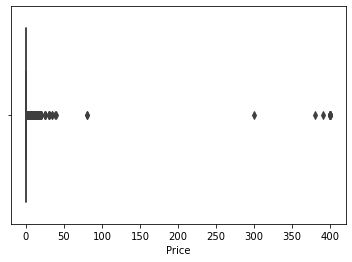

In [34]:
#Are there any outliers? Think about the price of usual apps on the Play Store.
sns.boxplot(inp0.Price);
plt.show();

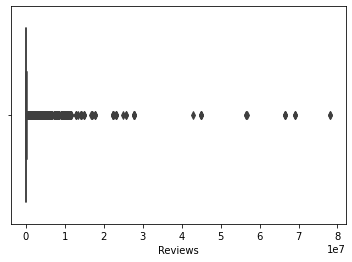

In [35]:

#Are there any apps with very high number of reviews? Do the values seem right?
sns.boxplot(inp0.Reviews)
plt.show();


### Checking Distribution and Skewness:

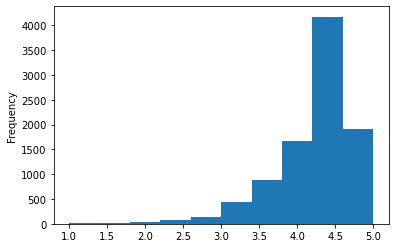

In [36]:
#Distributing the ratings
inp0.Rating.plot.hist()
#Show plot
plt.show()


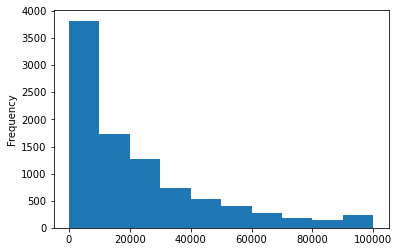

In [37]:
inp0['Size'].plot.hist()
#Show plot
plt.show()

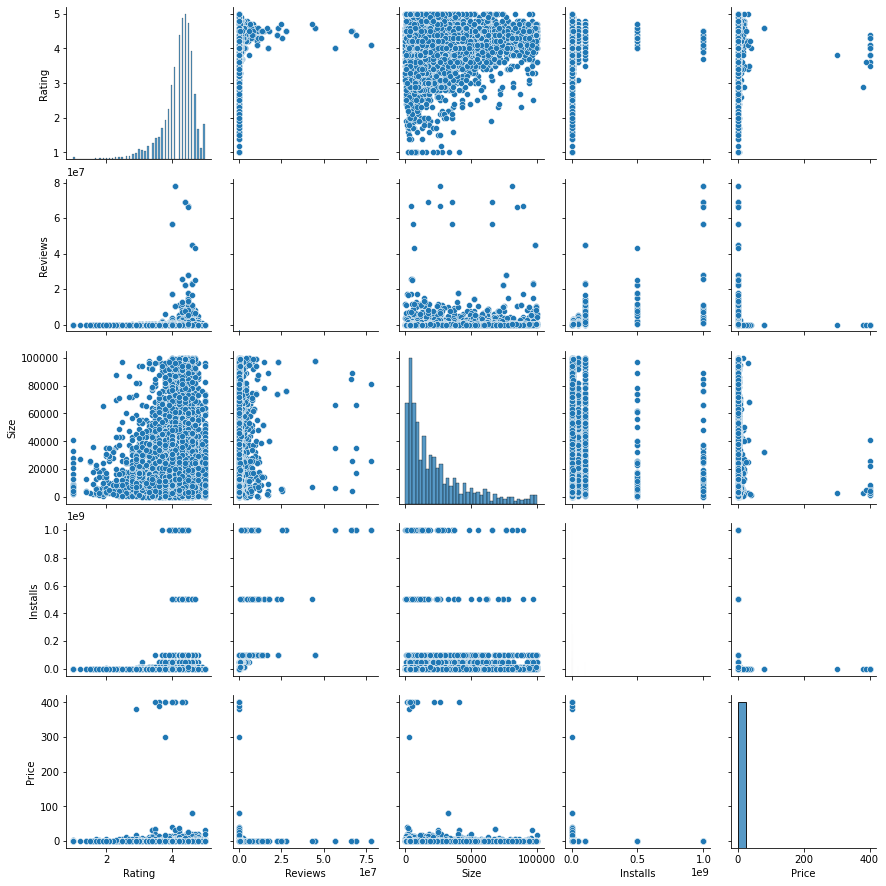

In [38]:
#Pair plot
sns.pairplot(data=inp0)

### Outlier Treatment:


In [39]:
#Checking the records of application having price more than $200
len(inp0[inp0.Price > 200])

15

In [40]:
inp0[inp0.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [41]:
# Removed and getting the required records from the dataset
inp0 = inp0[inp0.Price <= 200].copy()
inp0.shape

(9338, 13)

In [42]:
#Dropping the records with more than 2 million reviews
inp0 = inp0[inp0.Reviews <= 2000000]
inp0.shape


(8885, 13)

In [43]:

#Dropping the apps that have a very high number of installs
inp0.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])


0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [44]:
#Dropping the apps with more than 100M installs
len(inp0[inp0.Installs >= 1000000000])

6

In [45]:
inp0 = inp0[inp0.Installs < 1000000000].copy()
inp0.shape


(8879, 13)

#### 1. Make scatter plot/join plot for Rating vs. Price

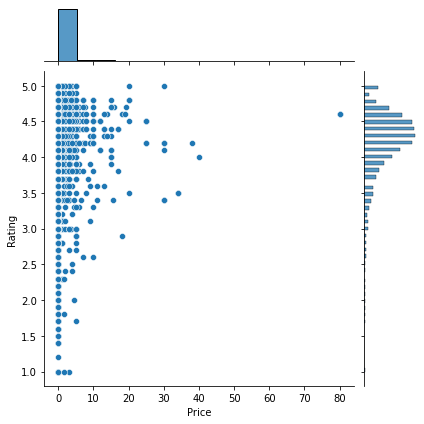

In [46]:
#What pattern do you observe? Does rating increase with price?
sns.jointplot(inp0.Price, inp0.Rating)


#### 2. Make scatter plot/joinplot for Rating vs Size

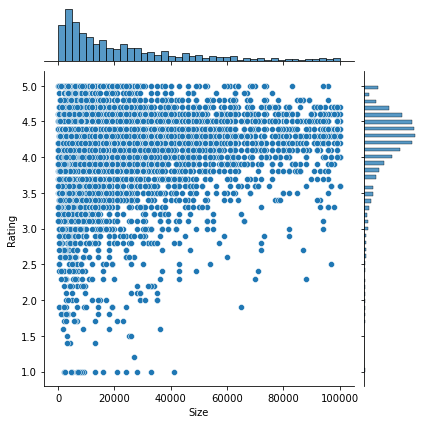

In [47]:
#Are heavier apps rated better?
sns.jointplot(inp0.Size, inp0.Rating)

#### 3. Make scatter plot/joinplot for Rating vs Reviews

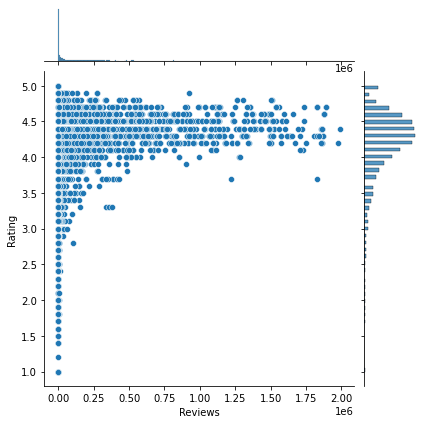

In [48]:
# Does more review mean a better rating always?
sns.jointplot(inp0.Reviews, inp0.Rating)


#### 4. Make boxplot for Rating vs Content Rating

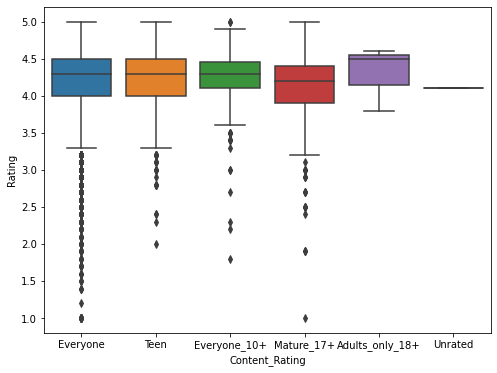

In [49]:
#Is there any difference in the ratings? Are some types liked better?
plt.figure(figsize=[8,6])
sns.boxplot(inp0['Content_Rating'], inp0.Rating);

#### 5. Make boxplot for Ratings vs. Category


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

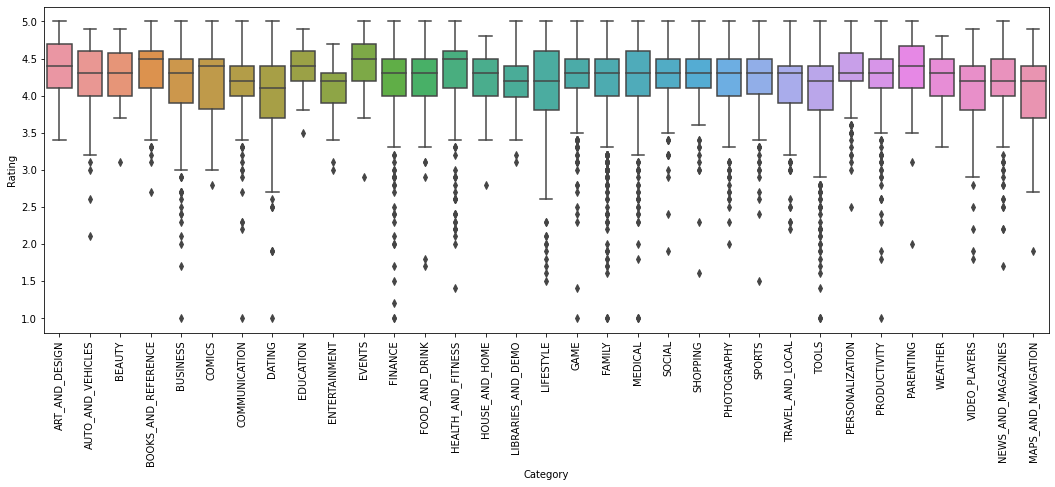

In [50]:
#Which genre has the best ratings?
plt.figure(figsize=[18,6])
sns.boxplot(inp0.Category, inp0.Rating)
plt.xticks(rotation=90)

### Pre-processing the Dataset

In [51]:
#Making a copy of the dataset
inp1 = inp0.copy()

#### Apply log transformation (np.log1p) to Reviews and Installs
Reviews and Installs have some values that are still relatively very high. Before building a linear regression model, you need to reduce the
skew.

In [52]:
#Reducing the skew
inp0.Installs.describe()

count    8.879000e+03
mean     5.595862e+06
std      2.421042e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      5.000000e+08
Name: Installs, dtype: float64

In [53]:
inp1.Installs = inp1.Installs.apply(np.log1p)

In [54]:
inp1.Reviews = inp1.Reviews.apply(np.log1p)

In [55]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [56]:
#Drop columns App, Last Updated, Current Ver, and Android Ver
inp1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)
inp1.shape  

(8879, 9)

#### Dummy Columns:
Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data,
and all data should be numeric. Dummy encoding is one way to convert character fields to numeric fields. Name of the dataframe should
be inp2

In [57]:
inp2 = pd.get_dummies(inp1, drop_first=True)

In [58]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools_Education', 'Genres_Travel_&_Local',
       'Genres_Travel_&_Local_Action_&_Adventure', 'Genres_Trivia',
       'Genres_Video_Players_&_Editors',
       'Genres_Video_Players_&_Editors_Creativity',
       'Genres_Video_Players_&_Editors_Music_&_Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

In [59]:
inp2.shape

(8879, 157)

### Train-test split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# train-test split
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)

In [62]:
df_train.shape,df_test.shape

((6215, 157), (2664, 157))

In [63]:
y_train = df_train.pop("Rating")
X_train = df_train

In [64]:
X_train.head(2)

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
1279,7.636270,6900.0,11.512935,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6900,5.799093,4800.0,11.512935,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
y_test = df_test.pop("Rating")
X_test = df_test

In [66]:
X_test.head(2)

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
1161,9.329456,24000.0,13.815512,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4125,3.663562,4800.0,8.517393,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
#Importing the statsmodel library
import statsmodels.api as sm

In [68]:
#Applying linear regression
model1 = sm.OLS(y_train, X_train)

In [69]:
model1 = model1.fit()

In [70]:
#Finding the summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3717.
Date:                Fri, 14 Apr 2023   Prob (F-statistic):                        0.00
Time:                        23:49:08   Log-Likelihood:                         -4281.7
No. Observations:                6215   AIC:                                      8811.
Df Residuals:                    6091   BIC:                                      9646.
Df Model:                         124                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1752      0.006     28.037      0.000       0.163       0.187
Size                                         -2.896e-07   3.37e-07     -0.859      0.391   -9.51e-07    3.72e-07
Installs                                        -0.1499      0.006    -24.184      0.000      -0.162      -0.138
Price                                            0.0006      0.003      0.177      0.860      -0.006       0.007
Category_AUTO_AND_VEHICLES                       1.6381      0.125     13.136      0.000       1.394       1.883
Category_BEAUTY                                  1.7213      0.128     13.462      0.000       1.471       1.972
Category_BOOKS_AND_REFERENCE                     1.6843      0.122     13.826      0.000       1.445       1.923
Category_BUSINESS                                1.6046      0.121     13.272      0.000       1.368       1.842
Category_COMICS                                  2.3786      0.226     10.517      0.000       1.935       2.822
Category_COMMUNICATION                           1.5478      0.121     12.765      0.000       1.310       1.786
Category_DATING                                  1.5013      0.122     12.262      0.000       1.261       1.741
Category_EDUCATION                               2.8642      0.251     11.419      0.000       2.373       3.356
Category_ENTERTAINMENT                           2.7757      0.251     11.065      0.000       2.284       3.267
Category_EVENTS                                  1.7447      0.126     13.792      0.000       1.497       1.993
Category_FAMILY                                  2.8988      0.243     11.920      0.000       2.422       3.376
Category_FINANCE                                 1.5685      0.121     12.976      0.000       1.332       1.806
Category_FOOD_AND_DRINK                          1.5993      0.123     13.006      0.000       1.358       1.840
Category_GAME                                    3.1390      0.241     13.046      0.000       2.667       3.611
Category_HEALTH_AND_FITNESS                      1.6296      0.121     13.464      0.000       1.392       1.867
Category_HOUSE_AND_HOME                          1.6151      0.124     13.002      0.000       1.372       1.859
Category_LIBRARIES_AND_DEMO                      1.6541      0.125     13.247      0.000       1.409       1.899
Category_LIFESTYLE                               1.5913      0.121     13.156      0.000       1.354       1.828
Category_MAPS_AND_NAVIGATION                     1.5212      0.123     12.399      0.000       1.281       1.762
Category_MEDICAL                              

In [72]:
#Prediction and evaluation
import sklearn.metrics as metrics
y_test_pred= model1.predict(X_test)

In [73]:
#Assessing the model using RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
#RMSE of "model1" = 0.49203326281981113

0.49203326281990467


In [74]:
#Calculating MPE
def MPE(y_test_pred,y_test):
    return ( ((y_test - y_test_pred) / y_test).mean()) * 100
print ('MPE: ' + str(MPE(y_test_pred,y_test)) )


MPE: -2.5730378350630696


In [75]:
#Calculating MAPE
def MAPE(y_test_pred,y_test):
    return np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
 
print ('MAPE: ' + str(MAPE(y_test_pred,y_test)))


MAPE: 9.490934337926705


In [76]:
#Create inp3
inp3 = inp2[['Rating','Reviews','Installs','Category_AUTO_AND_VEHICLES','Category_BEAUTY',
 'Category_BOOKS_AND_REFERENCE','Category_BUSINESS','Category_COMICS',
 'Category_COMMUNICATION','Category_DATING','Category_EDUCATION','Category_EDUCATION',
 'Category_ENTERTAINMENT','Category_EVENTS','Category_FAMILY','Category_FINANCE',
 'Category_FOOD_AND_DRINK','Category_GAME','Category_HEALTH_AND_FITNESS',
 'Category_HOUSE_AND_HOME','Category_LIBRARIES_AND_DEMO','Category_LIFESTYLE',
 'Category_MAPS_AND_NAVIGATION','Category_MEDICAL','Category_NEWS_AND_MAGAZINES',
 'Category_PARENTING','Category_PERSONALIZATION','Category_PHOTOGRAPHY',
 'Category_PRODUCTIVITY',
 'Category_SHOPPING','Category_SOCIAL','Category_SPORTS','Category_TOOLS',
 'Category_TRAVEL_AND_LOCAL',
 'Category_VIDEO_PLAYERS','Category_WEATHER','Type_Paid','Content_Rating_Everyone',
 'Content_Rating_Everyone_10+','Content_Rating_Mature_17+','Content_Rating_Teen',
 'Content_Rating_Unrated',
 'Genres_Art_&_Design','Genres_Art_&_Design_Creativity','Genres_Art_&_Design_Pretend_Play',
 'Genres_Auto_&_Vehicles','Genres_Beauty','Genres_Board_Brain_Games','Genres_Books_&_Reference',
 'Genres_Business','Genres_Casual','Genres_Casual_Action_&_Adventure','Genres_Casual_Brain_Games',
 'Genres_Casual_Pretend_Play','Genres_Comics','Genres_Comics_Creativity','Genres_Communication',
 'Genres_Dating','Genres_Education','Genres_Education_Action_&_Adventure',
 'Genres_Education_Creativity',
 'Genres_Education_Education','Genres_Education_Pretend_Play','Genres_Educational_Education',
 'Genres_Educational_Pretend_Play','Genres_Entertainment','Genres_Entertainment_Brain_Games',
 'Genres_Entertainment_Creativity','Genres_Entertainment_Music_&_Video','Genres_Events',
 'Genres_Finance','Genres_Food_&_Drink','Genres_Health_&_Fitness','Genres_House_&_Home',
 'Genres_Libraries_&_Demo','Genres_Lifestyle','Genres_Maps_&_Navigation','Genres_Medical',
 'Genres_Music_Music_&_Video','Genres_News_&_Magazines','Genres_Parenting',
 'Genres_Parenting_Education',
 'Genres_Parenting_Music_&_Video','Genres_Personalization','Genres_Photography',
 'Genres_Productivity',
 'Genres_Puzzle','Genres_Puzzle_Brain_Games','Genres_Racing_Action_&_Adventure',
 'Genres_Role_Playing',
 'Genres_Shopping','Genres_Simulation','Genres_Simulation_Action_&_Adventure',
 'Genres_Social',
 'Genres_Strategy','Genres_Tools','Genres_Tools_Education','Genres_Travel_&_Local',
 'Genres_Travel_&_Local_Action_&_Adventure','Genres_Weather']]

In [77]:
#Checking datatypes
inp3.dtypes

Rating                                      float64
Reviews                                     float64
Installs                                    float64
Category_AUTO_AND_VEHICLES                    uint8
Category_BEAUTY                               uint8
                                             ...   
Genres_Tools                                  uint8
Genres_Tools_Education                        uint8
Genres_Travel_&_Local                         uint8
Genres_Travel_&_Local_Action_&_Adventure      uint8
Genres_Weather                                uint8
Length: 100, dtype: object

In [78]:
inp3.shape

(8879, 100)

In [79]:
#split inp3
df_train, df_test = train_test_split(inp3, train_size = 0.7, random_state = 100)

In [80]:
#Separating the new dataframes
y_train1 = df_train.pop("Rating")
X_train1 = df_train

In [81]:
y_test1 = df_test.pop("Rating")
X_test1 = df_test

In [82]:
#Apply linear regression
model2 = sm.OLS(y_train1, X_train1)


In [83]:
model2 = model2.fit()

In [84]:
#Find the summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              6412.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):                        0.00
Time:                        00:08:24   Log-Likelihood:                         -4302.6
No. Observations:                6215   AIC:                                      8749.
Df Residuals:                    6143   BIC:                                      9234.
Df Model:                          72                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Reviews                                      0.1738      0.006     28.120      0.000       0.162       0.186
Installs                                    -0.1479      0.006    -24.049      0.000      -0.160      -0.136
Category_AUTO_AND_VEHICLES                   1.5996      0.124     12.891      0.000       1.356       1.843
Category_BEAUTY                              1.6841      0.127     13.232      0.000       1.435       1.934
Category_BOOKS_AND_REFERENCE                 1.6477      0.121     13.593      0.000       1.410       1.885
Category_BUSINESS                            1.5672      0.120     13.029      0.000       1.331       1.803
Category_COMICS                              2.3320      0.226     10.340      0.000       1.890       2.774
Category_COMMUNICATION                       1.5106      0.121     12.522      0.000       1.274       1.747
Category_DATING                              1.4687      0.122     12.045      0.000       1.230       1.708
Category_EDUCATION                           1.4881      0.124     12.048      0.000       1.246       1.730
Category_EDUCATION                           1.4881      0.124     12.048      0.000       1.246       1.730
Category_ENTERTAINMENT                       2.8894      0.247     11.696      0.000       2.405       3.374
Category_EVENTS                              1.7089      0.126     13.571      0.000       1.462       1.956
Category_FAMILY                              3.0092      0.239     12.567      0.000       2.540       3.479
Category_FINANCE                             1.5305      0.120     12.728      0.000       1.295       1.766
Category_FOOD_AND_DRINK                      1.5606      0.122     12.755      0.000       1.321       1.800
Category_GAME                                3.0847      0.239     12.904      0.000       2.616       3.553
Category_HEALTH_AND_FITNESS                  1.5906      0.120     13.211      0.000       1.355       1.827
Category_HOUSE_AND_HOME                      1.5765      0.124     12.756      0.000       1.334       1.819
Category_LIBRARIES_AND_DEMO                  1.6164      0.124     13.009      0.000       1.373       1.860
Category_LIFESTYLE                           1.5542      0.120     12.914      0.000       1.318       1.790
Category_MAPS_AND_NAVIGATION                 1.4830      0.122     12.149      0.000       1.244       1.722
Category_MEDICAL                             1.5982      0.120     13.307      0.000       1.363       1.834
Category_NEWS_AND_MAGAZINES                  1.5284      0.121     12.664      0.000       1.292       1.765
Category_PARENTING                       

model2 performs better:

R-squared value:
The most common way to evaluate the overall fit of a linear model is by the R-squared value.
R-squared is between 0 and 1 (or between 0 to 100%), and higher is better because it means that more variance is explained by the
model.
In case of our models, model1 and model2 have same R-squared values.

F-statistics:
In case of dataset that only have numerical values, it is said higher the F-statistic better the model.
In case of our models, model2 has more F-statistic value than model1.

AIC and BIC: 
In case of models, lesser the AIC and BIC, better the model.
In case of models, model2 has lesser AIC and BIC values than the model1.

In [85]:
#Prediction using "model2"
#Importing sklearn.metrics
import sklearn.metrics as metrics
y_test_pred1= model2.predict(X_test1)
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred1)))
#RMSE value of model1 = 0.49203326281981113 

0.4910204064233421


In [86]:
#Calculating MAPE
def MAPE(y_test_pred1,y_test1):
    return np.mean(np.abs((y_test1 - y_test_pred1) / y_test1)) * 100
print ('MAPE: ' + str(MAPE(y_test_pred1,y_test1)) )

MAPE: 9.467552790023408
